<a href="https://colab.research.google.com/github/CollinsRutto/Social-Media-Analysis-and-scrapping/blob/main/WordCloud_for_TrustPilot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

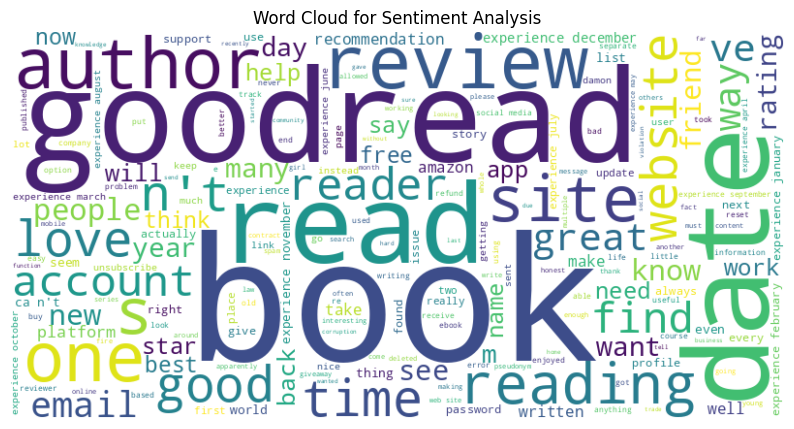

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
import requests
from bs4 import BeautifulSoup
from time import sleep

# Function to extract data from the soup object
def soup2list(src, list_, attr=None):
    if attr:
        for val in src:
            list_.append(val[attr])
    else:
        for val in src:
            list_.append(val.get_text(strip=True))

def extract_trustpilot_data(company, from_page, to_page):
    users = []
    ratings = []
    reviews = []

    for i in range(from_page, to_page + 1):
        result = requests.get(f"https://www.trustpilot.com/review/{company}?page={i}")
        soup = BeautifulSoup(result.content, 'html.parser')

        soup2list(soup.find_all('span', {'class': 'typography_heading-xxs__QKBS8 typography_appearance-default__AAY17'}), users)
        soup2list(soup.find_all('div', {'class': 'styles_reviewHeader__iU9Px'}), ratings, attr='data-service-review-rating')
        soup2list(soup.find_all('div', {'class': 'styles_reviewContent__0Q2Tg'}), reviews)

        sleep(1)

    df = pd.DataFrame({
        'User': users,
        'Rating': ratings,
        'Review': reviews
    })

    # Perform sentiment analysis
    sentiment_words = []
    for review in df['Review']:
        analysis = TextBlob(review)
        if analysis.sentiment.polarity != 0:
            sentiment_words.extend([word.lower() for word in analysis.words if len(word) > 1])  # Filter out single character words

    # Generate word cloud from sentiment words
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(sentiment_words))

    # Display the word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Sentiment Analysis')
    plt.show()

    return df

# Define parameters
company = 'goodreads.com'
from_page = 1
to_page = 7

# Extract data from Trustpilot reviews and generate word cloud for sentiment analysis
trustpilot_data = extract_trustpilot_data(company, from_page, to_page)
